In [1]:
# problem imports
from ne.benchmark.mop1 import MOP1
from ne.benchmark.saddle import Saddle

# alg imports
from ne.nash_eq_algs.bayes_ne import BayesNE
from ne.nash_eq_algs.gpgame import GPGame
from ne.nash_eq_algs.stoch_search_methods import iterated_best_response, hier_sa

# util imports
from ne.utils.plots import plot_decision_space, plot_regret_trace

# filter numerical convergence warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
np.random.seed(1)

#### Problem 1: SADDLE

In [2]:
dim = 2
x_opt = 0.5
is_noise = False
problem = Saddle(is_minimize=False, is_noise=is_noise, dim=dim, x_opt=x_opt)

###### BN-Exact

In [3]:
bn_exact = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=False, epsilon=0.15)

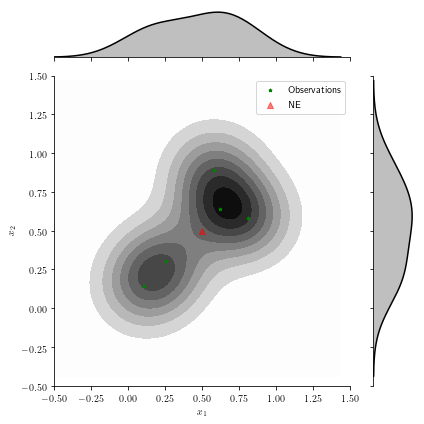

In [4]:
# show the initial design
plot_decision_space(bn_exact.pts, actual_ne=problem.get_x_ne(), title=None)

In [5]:
# Search
bn_exact.run()

WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.73e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.73e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.73e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.85e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  

iter 8 - x: [0.51649571 0.50003022], f(x): [-0.00027210753972791324, 0.00027210753972791324]
log-marginal likelihood for 0's payoff: 28.2021535869
log-marginal likelihood for 1's payoff: 28.202153587
iter 9 - x: [0.51317032 0.49955346], f(x): [-0.00017325788508809872, 0.00017325788508809872]
log-marginal likelihood for 0's payoff: 33.7674991438
log-marginal likelihood for 1's payoff: 33.7674991438
iter 10 - x: [0.51176429 0.49912659], f(x): [-0.0001376357268022721, 0.0001376357268022721]
log-marginal likelihood for 0's payoff: 37.5491351779
log-marginal likelihood for 1's payoff: 37.5491351779
iter 11 - x: [0.51110331 0.49873745], f(x): [-0.00012168949795095604, 0.00012168949795095604]
log-marginal likelihood for 0's payoff: 43.1984356163
log-marginal likelihood for 1's payoff: 43.1984356163
iter 12 - x: [0.51092722 0.49927765], f(x): [-0.00011888243211863038, 0.00011888243211863038]
log-marginal likelihood for 0's payoff: 47.0292533255
log-marginal likelihood for 1's payoff: 47.029253

In [6]:
# regression erros on the sampled points
bn_exact.errs

[array([0.08659771]),
 array([0.09084167]),
 array([0.01496262]),
 array([0.06827168]),
 array([0.04012682]),
 array([0.20672181]),
 array([0.01058078]),
 array([0.205149]),
 array([0.00069118]),
 array([0.00034658]),
 array([0.00023467]),
 array([0.00017774]),
 array([0.00014391]),
 array([0.00012058]),
 array([0.00010384])]

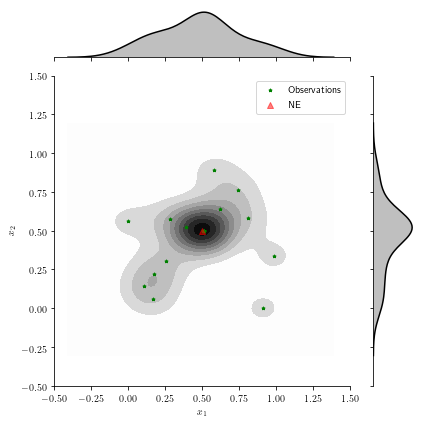

In [7]:
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 20, 'run': 1, 'alg': 'BN-exact', 'regret_trace': [0.020007684511105003, 0.020007684511105003, 0.020007684511105003, 0.020007684511105003, 0.020007684511105003, 0.020007684511105003, 0.020007684511105003, 0.011604192965785102, 0.011604192965785102, 0.011604192965785102, 0.011604192965785102, 0.011604192965785102, 0.011604192965785102, 0.0002650415776506417, 0.0001674653947614672, 0.00013728295693664566, 0.00012327508159869736, 0.00011911943446736196, 0.00011417289751489432, 2.8532633704515353e-05], 'fevals': 20}


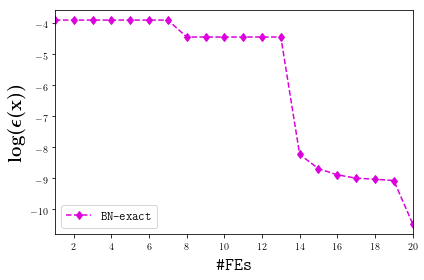

In [8]:
# compute regret trace
# We might get a negative numerical number as it is computed numerically.
run = 1
alg_variant = 'BN-exact'
actual_fevals = problem.get_num_evals()
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_exact.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs))
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [9]:
# get a suggested NE (experimental): 
best_ne_br = bn_exact.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_exact.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_exact.suggest_approx_ne(best_crit='std')

In [10]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_exact.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(problem.get_num_evals()))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_exact.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 0),
        bn_exact.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 1),
        bn_exact.approx_regret(problem.get_x_ne(), 1)
    ))
# This clears sampled (queried) points which comes handy when we would like
# to sample points sampled by the algorithm or by the `problem.ne_regret` method
_ = problem.get_xs()

NE: [0.5 0.5], Approx Regret: 1.4160510879
After 2280 function evaluations
br-best pt: [0.5104533  0.49890804], Actual regret: 0.000109247602074
br-best pt: [0.5104533  0.49890804], Approx regret: 0.872215002154
player 1 - br-best pt regret: 0.869882687586, NE regret : 1.41456520832
player 2 - br-best pt regret: 0.872215002154, NE regret : 1.4160510879
abr-best pt: [0.62511706 0.64144858], Actual regret: 0.0199569570379
abr-best pt: [0.62511706 0.64144858], Approx regret: -17.5417168502
player 1 - abr-best pt regret: -19.253238149, NE regret : 1.41456520832
player 2 - abr-best pt regret: -17.5417168502, NE regret : 1.4160510879
std-best pt: [0.5104533  0.49890804], Actual regret: 0.000109268945896
std-best pt: [0.5104533  0.49890804], Approx regret: 0.872215002154
player 1 - std-best pt regret: 0.869882687586, NE regret : 1.41456520832
player 2 - std-best pt regret: 0.872215002154, NE regret : 1.4160510879


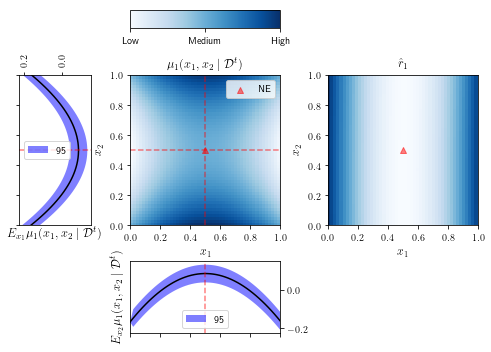

In [11]:
# view the current belief for player 1
bn_exact.plot_player_posterior(p=0, actual_ne=problem.get_x_ne(), title=None)

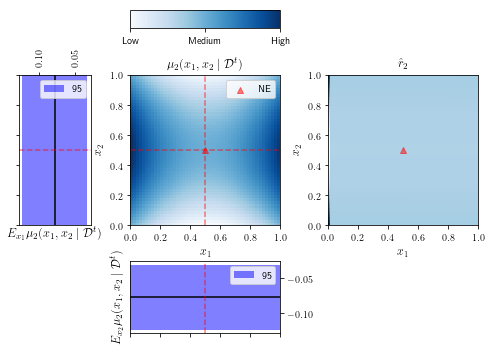

In [12]:
# view the current belief for player 2
bn_exact.plot_player_posterior(p=1, actual_ne=problem.get_x_ne(), title=None)

##### BN-Approx

WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.23e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.23e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=2.23e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  flat fitness (f=-0.077364, sigma=3.11e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=1):  

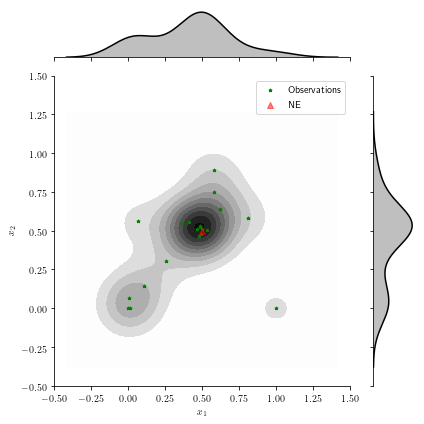

In [13]:
bn_approx = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=True)
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

In [14]:
# The following algorithms assume minimizing the objective functions
problem = Saddle(is_minimize=True, is_noise=is_noise, dim=dim, x_opt=x_opt)

##### GPGame

GPGame {'_crit': 'psim', '_max_iters': 20, '_n_init': 20, '_grid': 31, '_seed': 1, '_var_assignment': [1, 2], '_nobj': 2, 'r_fcn_str': '\n                function()\n                {\n                    require(GPGame)\n                    # Grid definition: player 1 plays x1...xj, player 2 xj+1...xn\n                    # The grid is a lattice made of two designs of different sizes\n                    n.s <- c(31, 31)\n                    x.to.obj <- c(1, 2)\n                    integcontrol <- list(n.s=n.s, gridtype=\'lhs\')\n                    # Set filtercontrol: window filter applied for integration and candidate points\n                    filtercontrol <- list(nsimPoints=800, ncandPoints=200,\n                    filter=c("window", "window"))\n                    # Set km control: lower bound is specified for the covariance range\n                    # Covariance type and model trend are specified\n                    kmcontrol <- list(lb=rep(.2,4), model.trend=~1, covtype="

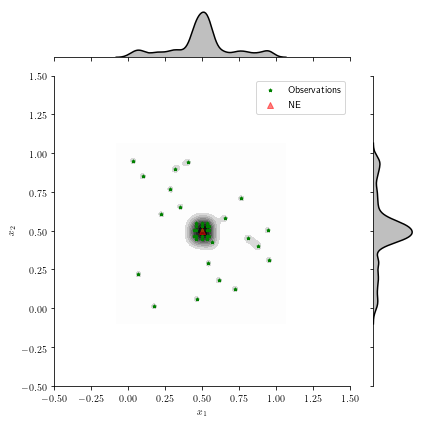

In [15]:
gpg = GPGame(fct=problem.evaluate, var_assignment=[1,2], nobj=2)
_, pt, _ = gpg.run()
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

In [16]:
print("GPG-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))
# clear sampled points
_ = problem.get_xs()

GPG-best pt: [0.5017106571580253, 0.5017106571580253], Actual regret: 2.80436408956e-06


##### StochSearch

x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105


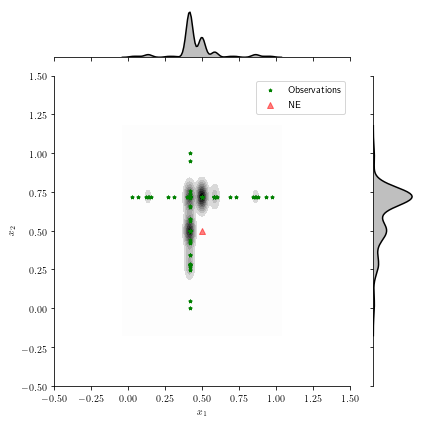

Iterated BR-best pt: [0.5 0.5], Actual regret: -5.68911534834e-08


In [17]:
# Iterated Best respone
pt = iterated_best_response(problem.evaluate, n_xs=[1, 1], max_fevals=500)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Iterated BR-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

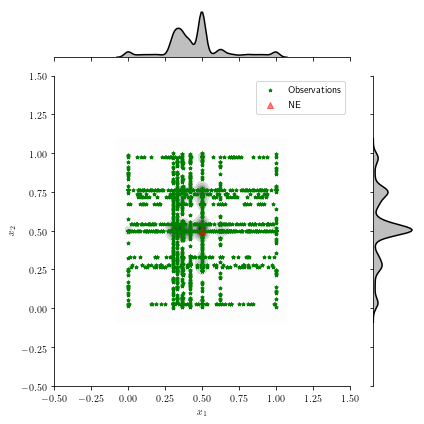

Hier SA-best pt: [0.5        0.54412086], Actual regret: 0.00194506735714


In [18]:
# Hierarchical SA
pt = hier_sa(problem.evaluate, n_xs=[1, 1], max_fevals=100)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Hier SA-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

#### Problem 2: MOP

In [19]:
problem = MOP1(is_minimize=False, is_noise=False)
# note: since the  MOP's domain is not [0,1]^D, and the fact that BayesNE operates in [0,1]^D.
# we set the flag is_unit in the `problem.ne_regret` when computing the regret of a point in [0,1]^D

In [20]:
bn_approx = BayesNE(problem.evaluate, [1, 1], is_approx=True, max_fevals=40, epsilon=0.05)

iter 0 - x: [0.01299606 0.998477  ], f(x): [-13.621038127742239, 14.391045961530754]
log-marginal likelihood for 0's payoff: -54.1950498797
log-marginal likelihood for 1's payoff: -29.2077349617
iter 1 - x: [0.05819327 0.99939567], f(x): [-4.744721767265128, 19.3310709980171]
log-marginal likelihood for 0's payoff: -58.6553811366
log-marginal likelihood for 1's payoff: -31.3892782908
iter 2 - x: [0.99859774 0.45880178], f(x): [-17.04413066550089, 12.562880559882426]
log-marginal likelihood for 0's payoff: -62.4628909843
log-marginal likelihood for 1's payoff: -32.949069149
iter 3 - x: [0.00426217 0.99836978], f(x): [-16.242699569902747, 13.14311247027106]
log-marginal likelihood for 0's payoff: -64.7453625173
log-marginal likelihood for 1's payoff: -35.2100428522
iter 4 - x: [0.99302143 0.96066071], f(x): [-133.90758512643006, 12.428485778629462]
log-marginal likelihood for 0's payoff: -73.7130776628
log-marginal likelihood for 1's payoff: -36.3723671205
iter 5 - x: [0.00109312 0.99983

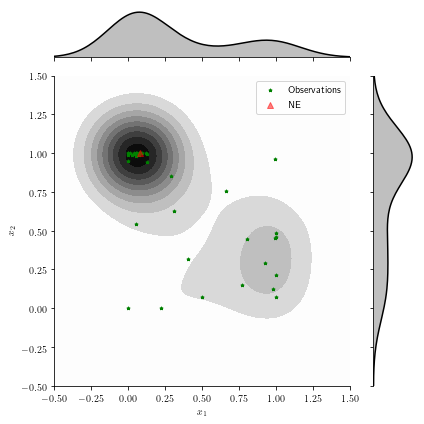

In [21]:
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 40, 'run': 1, 'alg': 'BN-approx', 'regret_trace': [49.88016437840738, 22.60584569406311, 3.7162357196722873, 3.7162357196722873, 3.7162357196722873, 2.66573730156406, 2.66573730156406, 2.66573730156406, 2.66573730156406, 2.66573730156406, 2.66573730156406, 1.1097544548191074, 1.1097544548191074, 1.1097544548191074, 1.1097544548191074, 1.1097544548191074, 1.1097544548191074, 1.1097544548191074, 0.16254717901516358, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.0493951599812581, 0.016355065514891187, 0.016355065514891187, 0.016355065514891187, 0.016355065514891187, 0.016355065514891187, 0.016355065514891187, 0.016355065514891187, 0.0009471319812868195, 0.0009471319812868195, 0.0009471319812868195, 0.0009471319812868195, 0.0009471319812868195, 0.0009471319812868195], 'fevals': 40}


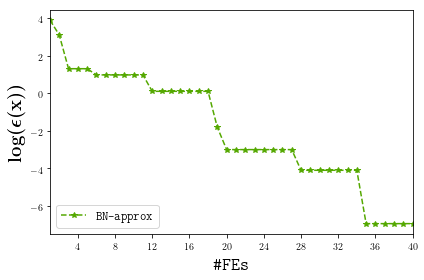

In [22]:
# compute regret trace
run = 1
dim = 2
alg_variant = 'BN-approx'
actual_fevals = len(bn_approx.pts)
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_approx.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs, is_unit=True)) # is_unit denote that xs is in the space[0,1]
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [23]:
# get a suggested NE (experimental):
best_ne_br = bn_approx.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_approx.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_approx.suggest_approx_ne(best_crit='std')

In [24]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_approx.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(len(bn_approx.pts)))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt, is_unit=True)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_approx.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 0),
        bn_approx.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 1),
        bn_approx.approx_regret(problem.get_x_ne(), 1)
    ))

NE: [0.08093333 1.        ], Approx Regret: 0.957641227016
After 40 function evaluations
br-best pt: [0.01299606 0.998477  ], Actual regret: 10.0881705523
br-best pt: [0.01299606 0.998477  ], Approx regret: 0.965644807
player 1 - br-best pt regret: 0.975485862179, NE regret : 0.959143296843
player 2 - br-best pt regret: 0.363789044894, NE regret : 0.35148398596
abr-best pt: [0.00109312 0.99983586], Actual regret: 0.00183445597995
abr-best pt: [0.00109312 0.99983586], Approx regret: 0.970865817344
player 1 - abr-best pt regret: 0.947905067944, NE regret : 1.00333608346
player 2 - abr-best pt regret: 0.382864758579, NE regret : 0.28638326954
std-best pt: [0.05413365 0.98220873], Actual regret: 2.21206141408
std-best pt: [0.05413365 0.98220873], Approx regret: 0.950651360087
player 1 - std-best pt regret: 0.919300859178, NE regret : 1.03023833657
player 2 - std-best pt regret: 0.367469299483, NE regret : 0.190563803665


In [25]:
closest_sampled_pt = bn_approx.pts[np.argmin(np.sum((bn_approx.pts - problem.get_x_ne())**2, axis=1)),:]
print("BN-closest (to actual NE) sampled pt: {}, Actual regret: {}".format(closest_sampled_pt, problem.ne_regret(closest_sampled_pt, is_unit=True)))

BN-closest (to actual NE) sampled pt: [0.08021123 0.99997706], Actual regret: -0.0149089156987
